In [2]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

Using TensorFlow backend.


In [3]:
os.chdir('/Users/maneeshagvs/documents/datasets')

os.getcwd()



'/Users/maneeshagvs/Documents/datasets'

In [4]:
#Load data
marketing_train = pd.read_csv("marketing_tr.csv")

In [5]:
#Exploratory Data Analysis
marketing_train['schooling'] = marketing_train['schooling'].replace("illiterate", "unknown")
marketing_train['schooling'] = marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"], "high.school")
marketing_train['default'] = marketing_train['default'].replace("yes", "unknown")
marketing_train['marital'] = marketing_train['marital'].replace("unknown", "married")
marketing_train['month'] = marketing_train['month'].replace(["sep","oct","mar","dec"], "dec")
marketing_train['month'] = marketing_train['month'].replace(["aug","jul","jun","may","nov"], "jun")
marketing_train['loan'] = marketing_train['loan'].replace("unknown", "no")
marketing_train['profession'] = marketing_train['profession'].replace(["management","unknown","unemployed","admin."], "admin.")
marketing_train['profession'] = marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"], "blue-collar")

## Missing Value Analysis


In [6]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(marketing_train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(marketing_train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

In [7]:
#imputation method
#Actual value = 29
#Mean = 40.01
#Median = 38
#KNN = 29.35

#create missing value
#marketing_train['custAge'].loc[70] = np.nan

In [8]:
#Impute with mean
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].mean())

#Impute with median
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].median())

In [9]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, marketing_train.shape[1]):
    #print(i)
    if(marketing_train.iloc[:,i].dtypes == 'object'):
        marketing_train.iloc[:,i] = pd.Categorical(marketing_train.iloc[:,i])
        #print(marketing_train[[i]])
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].cat.codes 
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].astype('object')
        
        lis.append(marketing_train.columns[i])
        

In [10]:
#replace -1 with NA to impute
for i in range(0, marketing_train.shape[1]):
    marketing_train.iloc[:,i] = marketing_train.iloc[:,i].replace(-1, np.nan) 

In [11]:
#KNN Complete is replaced by .fit_transform to match the SK_learn 

#Apply KNN imputation algorithm
marketing_train = pd.DataFrame(KNN(k = 3).fit_transform(marketing_train), columns = marketing_train.columns)

Imputing row 1/7414 with 0 missing, elapsed time: 15.129
Imputing row 101/7414 with 1 missing, elapsed time: 15.138
Imputing row 201/7414 with 0 missing, elapsed time: 15.143
Imputing row 301/7414 with 1 missing, elapsed time: 15.148
Imputing row 401/7414 with 0 missing, elapsed time: 15.153
Imputing row 501/7414 with 0 missing, elapsed time: 15.158
Imputing row 601/7414 with 0 missing, elapsed time: 15.163
Imputing row 701/7414 with 1 missing, elapsed time: 15.168
Imputing row 801/7414 with 1 missing, elapsed time: 15.173
Imputing row 901/7414 with 1 missing, elapsed time: 15.178
Imputing row 1001/7414 with 0 missing, elapsed time: 15.183
Imputing row 1101/7414 with 1 missing, elapsed time: 15.189
Imputing row 1201/7414 with 1 missing, elapsed time: 15.194
Imputing row 1301/7414 with 1 missing, elapsed time: 15.200
Imputing row 1401/7414 with 0 missing, elapsed time: 15.205
Imputing row 1501/7414 with 1 missing, elapsed time: 15.210
Imputing row 1601/7414 with 1 missing, elapsed time:

In [12]:
#Convert into proper datatypes

#solution for round off error - https://stackoverflow.com/questions/19387608/attributeerror-rint-when-using-numpy-round


for i in lis:
    marketing_train.loc[:,i] = np.around(marketing_train.loc[:,i].astype(np.double),3)
    marketing_train.loc[:,i] = marketing_train.loc[:,i].astype('object')


## Outlier Analysis

In [13]:
#df = marketing_train.copy()
#marketing_train = df.copy()

In [14]:
# #Plot boxplot to visualize Outliers
# %matplotlib inline  
# plt.boxplot(marketing_train['custAge'])

In [15]:
type('sds')

str

In [16]:
#save numeric names
cnames =  ["custAge", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m",
           "nr.employed", "pmonths", "pastEmail"]

In [17]:
# #Detect and delete outliers from data
# for i in cnames:
#     print(i)
#     q75, q25 = np.percentile(marketing_train.loc[:,i], [75 ,25])
#     iqr = q75 - q25

#     min = q25 - (iqr*1.5)
#     max = q75 + (iqr*1.5)
#     print(min)
#     print(max)
    
#     marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] < min].index)
#     marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] > max].index)

In [18]:
#Detect and replace with NA
# #Extract quartiles
# q75, q25 = np.percentile(marketing_train['custAge'], [75 ,25])

# #Calculate IQR
# iqr = q75 - q25

# #Calculate inner and outer fence
# minimum = q25 - (iqr*1.5)
# maximum = q75 + (iqr*1.5)

# #Replace with NA
# marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
# marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan

# #Calculate missing value
# missing_val = pd.DataFrame(marketing_train.isnull().sum())

# #Impute with KNN
# marketing_train = pd.DataFrame(KNN(k = 3).complete(marketing_train), columns = marketing_train.columns)

## Feature Selection

In [19]:
##Correlation analysis
#Correlation plot
df_corr = marketing_train.loc[:,cnames]

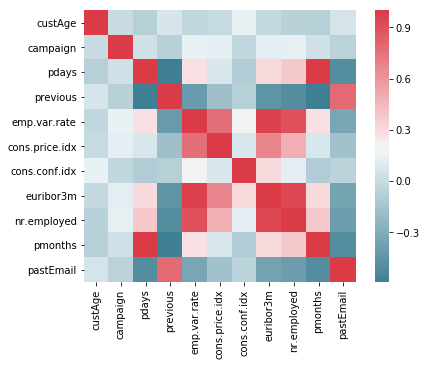

In [20]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [21]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["profession", "marital", "schooling", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [22]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(marketing_train['responded'], marketing_train[i]))
    print(p)

profession
1.6242589537712605e-34
marital
4.693435664866768e-05
schooling
3.0802565674571545e-34
default
1.626010224096433e-15
housing
0.5469213692385477
loan
0.09547438986454948
contact
4.416434113838791e-36
month
3.3492292613263237e-139
day_of_week
2.3175048561931414e-12
poutcome
3.898575747043989e-181


In [23]:
marketing_train = marketing_train.drop(['pdays', 'emp.var.rate', 'day_of_week', 'loan', 'housing'], axis=1)

## Feature Scaling

In [24]:
#df = marketing_train.copy()
#marketing_train = df.copy()

(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

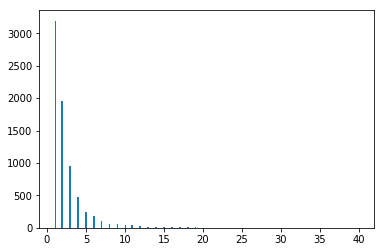

In [25]:
#Normality check
%matplotlib inline  
plt.hist(marketing_train['campaign'], bins='auto')

In [26]:
cnames = ["custAge","campaign","previous","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
           "pmonths","pastEmail"]

In [27]:
#Nomalisation
for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - min(marketing_train[i]))/(max(marketing_train[i]) - min(marketing_train[i]))

custAge
campaign
previous
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [28]:
# #Standarisation
# for i in cnames:
#     print(i)
#     marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()

## Sampling Techniques

In [29]:
##Simple random sampling
#Sim_Sampling = marketing_train.sample(5000)

In [30]:
# ##Systematic Sampling
# #Calculate the K value
# k = len(marketing_train)/3500

# # Generate a random number using simple random sampling
# RandNum = randrange(0, 5)

# #select Kth observation starting from RandNum
# Sys_Sampling = marketing_train.iloc[RandNum::k, :]

In [31]:
# #Stratified sampling
# from sklearn.cross_validation import train_test_split

# #Select categorical variable
# y = marketing_train['profession']

#select subset using stratified Sampling
#Rest, Sample = train_test_split(marketing_train, test_size = 0.6, stratify = y)

In [32]:
#marketing_train = pd.read_csv("marketing_train_Model.csv")

## Model Development

In [33]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace(0, 'No')
marketing_train['responded'] = marketing_train['responded'].replace(1, 'Yes')

In [ ]:
#Divide data into train and test
X = marketing_train.values[:, 0:16]
Y = marketing_train.values[:,16]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [ ]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

#Create dot file to visualise tree  #http://webgraphviz.com/
# dotfile = open("pt.dot", 'w')
# df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = marketing_train.columns)

In [ ]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Results
#Accuracy: 84.49
#FNR: 63

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [ ]:
RF_Predictions = RF_model.predict(X_test)

In [ ]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 88
#FNR: 67

In [ ]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace('No', 0)
marketing_train['responded'] = marketing_train['responded'].replace('Yes', 1)

In [ ]:
#Create logistic data. Save target variable first
marketing_train_logit = pd.DataFrame(marketing_train['responded'])

In [ ]:
#Add continous variables
marketing_train_logit = marketing_train_logit.join(marketing_train[cnames])

In [ ]:
marketing_train_logit.head()

In [ ]:
##Create dummies for categorical variables
cat_names = ["profession", "marital", "schooling", "default", "contact", "month", "poutcome"]

for i in cat_names:
    temp = pd.get_dummies(marketing_train[i], prefix = i)
    marketing_train_logit = marketing_train_logit.join(temp)

In [ ]:
Sample_Index = np.random.rand(len(marketing_train_logit)) < 0.8

train = marketing_train_logit[Sample_Index]
test = marketing_train_logit[~Sample_Index]

In [ ]:
#select column indexes for independent variables
train_cols = train.columns[1:30]

In [ ]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['responded'], train[train_cols]).fit()

logit.summary()

In [ ]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

In [ ]:
#Build confusion matrix
CM = pd.crosstab(test['responded'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

(FN*100)/(FN+TP)

In [ ]:
#Accuracy: 90
#FNR: 74

In [ ]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)

In [ ]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [ ]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 89
#FNR: 76

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [ ]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [ ]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 81
#FNR: 40

## Cluster Analysis

In [ ]:
#Load data
df = pd.read_csv("df.csv")

In [ ]:
#Load required libraries
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(df.iloc[:,0:4])
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
#Implement kmeans
kmeans_model = KMeans(n_clusters = 3).fit(df.iloc[:,0:4])

In [ ]:
#Summarize output
pd.crosstab(df['Species'], kmeans_model.labels_)

In [ ]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df.iloc[:,0:4] )
    cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:
%matplotlib inline  

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )